Implementing Principal Component Analysis using SVD
===

In [ ]:
import numpy as np

class PCA():
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
        # U: left singular vectors (n_samples, n_features)
        # S: singular values (n_features,)
        # Vt: right singular vectors (n_features, n_features)

        self.components = Vt[:self.n_components]

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components.T)


(200, 2) (2,) (2, 2)
[[ 0.69951524  0.71461768]
 [ 0.71461768 -0.69951524]]


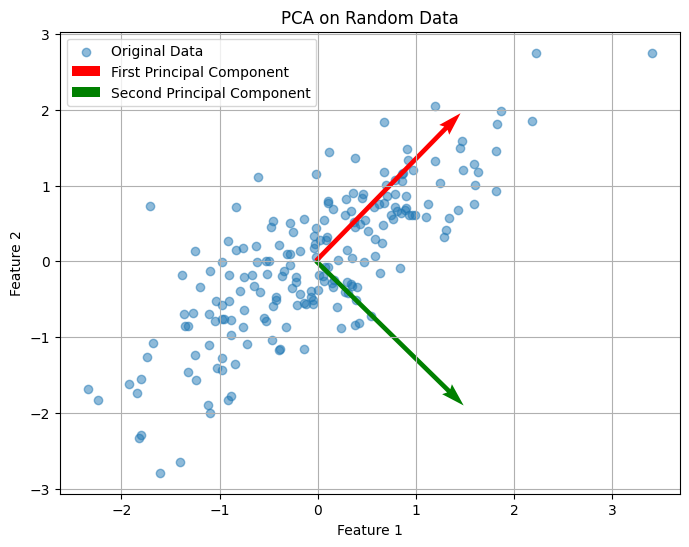

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate random data
np.random.seed(42)
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]  # diagonal covariance
data = np.random.multivariate_normal(mean, cov, 200)

# Step 3: Visualize the original data and principal components
plt.figure(figsize=(8, 6))

# Original data
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Original Data')


# Step 2: Apply PCA
pca = PCA(n_components=2)
pca.fit(data)
transformed_data = pca.transform(data)
print(pca.components)

# Principal components
origin = np.mean(data, axis=0)
plt.quiver(*origin, *pca.components[0], color='r', scale=3, label='First Principal Component')
plt.quiver(*origin, *pca.components[1], color='g', scale=3, label='Second Principal Component')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('PCA on Random Data')
plt.grid(True)
plt.show()